# Python for investing

In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
yf.pdr_override()

In [43]:
import mplfinance as mpf
import pandas_ta as ta

## import data via Yahoo finance

### example

In [3]:
EURUSD = pdr.get_data_yahoo("EURUSD=x", start = '2019-01-01', end= '2021-07-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
EURUSD

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1.143890,1.146592,1.142231,1.143995,1.143995,0
2019-01-01,1.149425,1.155001,1.146500,1.149306,1.149306,0
2019-01-02,1.146132,1.149700,1.134572,1.146171,1.146171,0
2019-01-03,1.131734,1.140914,1.131734,1.131811,1.131811,0
2019-01-04,1.139095,1.141774,1.134816,1.139108,1.139108,0
...,...,...,...,...,...,...
2021-06-24,1.193161,1.195672,1.191995,1.193317,1.193317,0
2021-06-25,1.192791,1.197447,1.192791,1.193033,1.193033,0
2021-06-28,1.194215,1.194600,1.190462,1.194215,1.194215,0


### change from daily data to weekly data (on MONDAY)

In [5]:
EURUSD.asfreq('W-MON')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1.143890,1.146592,1.142231,1.143995,1.143995,0
2019-01-07,1.141292,1.147447,1.140524,1.141044,1.141044,0
2019-01-14,1.146276,1.148369,1.145161,1.146014,1.146014,0
2019-01-21,1.136544,1.138822,1.135796,1.136557,1.136557,0
2019-01-28,1.141266,1.144558,1.139095,1.141305,1.141305,0
...,...,...,...,...,...,...
2021-05-31,1.219007,1.223391,1.218413,1.219007,1.219007,0
2021-06-07,1.216575,1.220200,1.214506,1.216841,1.216841,0
2021-06-14,1.211079,1.213151,1.209526,1.211020,1.211020,0


#### weekly return

In [6]:
EURUSD.asfreq('W-MON').pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,-0.002271,0.000746,-0.001494,-0.002579,-0.002579,NaN
2019-01-14,0.004367,0.000804,0.004065,0.004355,0.004355,NaN
2019-01-21,-0.008490,-0.008313,-0.008178,-0.008251,-0.008251,NaN
2019-01-28,0.004154,0.005036,0.002905,0.004177,0.004177,NaN
...,...,...,...,...,...,...
2021-05-31,0.000731,0.000367,0.000682,0.000561,0.000561,NaN
2021-06-07,-0.001995,-0.002609,-0.003206,-0.001777,-0.001777,NaN
2021-06-14,-0.004517,-0.005777,-0.004100,-0.004783,-0.004783,NaN


<AxesSubplot:xlabel='Date'>

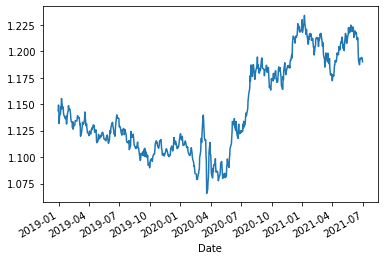

In [7]:
EURUSD.Close.plot()

<AxesSubplot:xlabel='Date'>

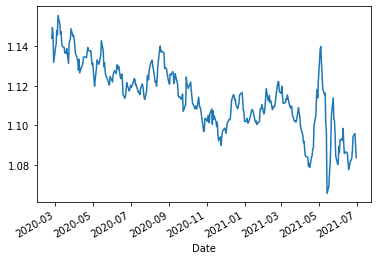

In [8]:

# move 300 line
EURUSD.Close.shift(300).plot()

#### daily return

<AxesSubplot:xlabel='Date'>

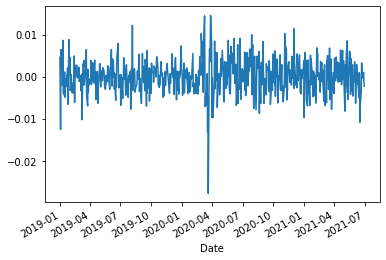

In [9]:
EURUSD.Close.pct_change().plot()

<AxesSubplot:xlabel='Date'>

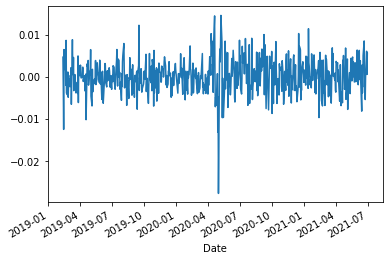

In [10]:
# you want to have smoother line

EURUSD.Close.shift(30).pct_change().plot()

## import multiple data

In [11]:
start = '2017-01-01'
end = '2017-04-30'
data = pdr.get_data_yahoo('MSFT AAPL', start = start, end = end)

[*********************100%***********************]  2 of 2 completed


In [12]:
data.head()

Adj Close                 Close                  High             \
                 AAPL       MSFT       AAPL       MSFT       AAPL       MSFT   
Date                                                                           
2017-01-03  27.219830  57.807823  29.037500  62.580002  29.082500  62.840000   
2017-01-04  27.189365  57.549171  29.004999  62.299999  29.127501  62.750000   
2017-01-05  27.327637  57.549171  29.152500  62.299999  29.215000  62.660000   
2017-01-06  27.632294  58.048000  29.477501  62.840000  29.540001  63.150002   
2017-01-09  27.885384  57.863251  29.747499  62.639999  29.857500  63.080002   

                  Low                  Open                Volume            
                 AAPL       MSFT       AAPL       MSFT       AAPL      MSFT  
Date                                                                         
2017-01-03  28.690001  62.130001  28.950001  62.790001  115127600  20694100  
2017-01-04  28.937500  62.119999  28.962500  62.480000   84472400  21340000  
2017-01-05  28.952499  62.029999  28.980000  62.189999   88774400  24876000  
2017-01-06  29.117500  62.040001  29.195000  62.299999  127007600  19922900  
2017-01-09  29.485001  62.540001  29.487499  62.759998  134247600  20382700

In [13]:
data.stack(level=0)

AAPL          MSFT
Date                                            
2017-01-03 Adj Close  2.721983e+01  5.780782e+01
           Close      2.903750e+01  6.258000e+01
           High       2.908250e+01  6.284000e+01
           Low        2.869000e+01  6.213000e+01
           Open       2.895000e+01  6.279000e+01
...                            ...           ...
2017-04-28 Close      3.591250e+01  6.846000e+01
           High       3.607500e+01  6.914000e+01
           Low        3.581750e+01  6.769000e+01
           Open       3.602250e+01  6.891000e+01
           Volume     8.344160e+07  3.954880e+07

[486 rows x 2 columns]

In [14]:
data.stack(level=1)

Adj Close      Close       High        Low       Open  \
Date                                                                     
2017-01-03 AAPL  27.219830  29.037500  29.082500  28.690001  28.950001   
           MSFT  57.807823  62.580002  62.840000  62.130001  62.790001   
2017-01-04 AAPL  27.189365  29.004999  29.127501  28.937500  28.962500   
           MSFT  57.549171  62.299999  62.750000  62.119999  62.480000   
2017-01-05 AAPL  27.327637  29.152500  29.215000  28.952499  28.980000   
...                    ...        ...        ...        ...        ...   
2017-04-26 MSFT  63.037334  67.830002  68.309998  67.620003  68.080002   
2017-04-27 AAPL  33.843388  35.947498  36.040001  35.827499  35.980000   
           MSFT  63.446239  68.269997  68.379997  67.580002  68.150002   
2017-04-28 AAPL  33.810429  35.912498  36.075001  35.817501  36.022499   
           MSFT  63.622814  68.459999  69.139999  67.690002  68.910004   

                    Volume  
Date                        
2017-01-03 AAPL  115127600  
           MSFT   20694100  
2017-01-04 AAPL   84472400  
           MSFT   21340000  
2017-01-05 AAPL   88774400  
...                    ...  
2017-04-26 MSFT   26190800  
2017-04-27 AAPL   56985200  
           MSFT   34971000  
2017-04-28 AAPL   83441600  
           MSFT   39548800  

[162 rows x 6 columns]

In [15]:
data_stack_lev1 = data.stack(level = 1)

In [16]:
data_stack_lev1.reset_index().set_index('Date')

,level_1,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2017-01-03,AAPL,27.219830,29.037500,29.082500,28.690001,28.950001,115127600
2017-01-03,MSFT,57.807823,62.580002,62.840000,62.130001,62.790001,20694100
2017-01-04,AAPL,27.189365,29.004999,29.127501,28.937500,28.962500,84472400
2017-01-04,MSFT,57.549171,62.299999,62.750000,62.119999,62.480000,21340000
2017-01-05,AAPL,27.327637,29.152500,29.215000,28.952499,28.980000,88774400
...,...,...,...,...,...,...,...
2017-04-26,MSFT,63.037334,67.830002,68.309998,67.620003,68.080002,26190800
2017-04-27,AAPL,33.843388,35.947498,36.040001,35.827499,35.980000,56985200
2017-04-27,MSFT,63.446239,68.269997,68.379997,67.580002,68.150002,34971000


In [17]:
data_stack = data_stack_lev1.reset_index().set_index('Date').rename(columns={'level_1':'stock'})

## Candlestick plot with mplfinance

In [18]:
start = '2021-01-01'
end = '2022-09-05'
PTT = pdr.get_data_yahoo("PTT.BK", start = start, end = end )

[*********************100%***********************]  1 of 1 completed


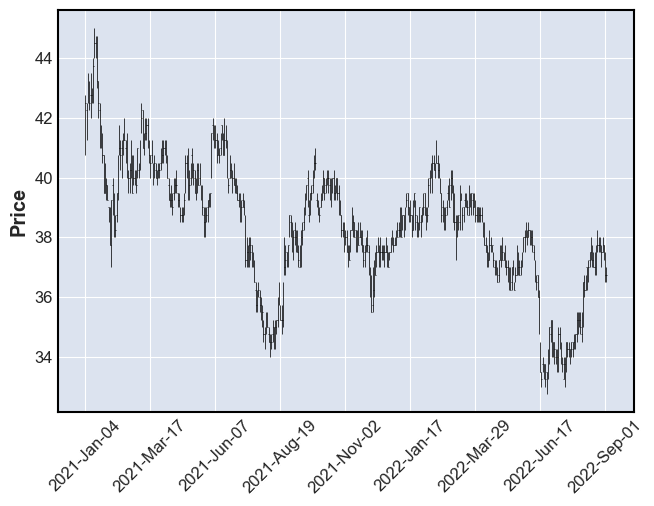

In [19]:
mpf.plot(PTT)

### add more parameter like moving average, volumn or plotting style

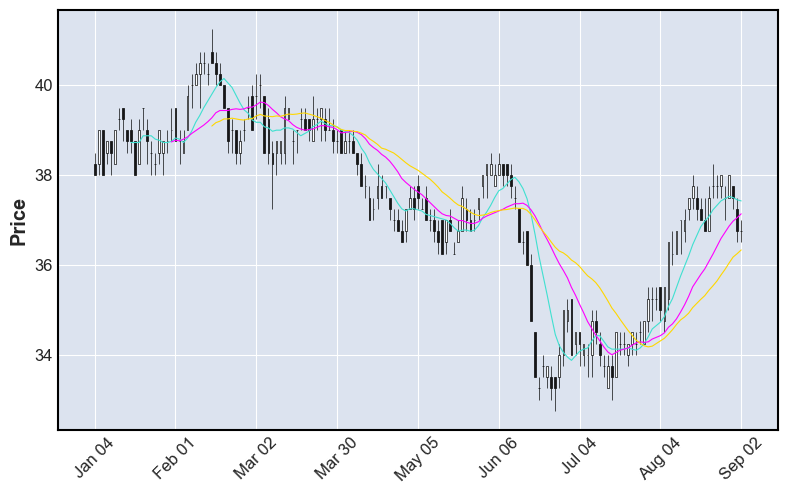

In [20]:
# choose only 2022 and show candle and add moving average
mpf.plot(PTT.loc['2022'], type = 'candle', figsize = (10,6), mav = (10,20,30))

In [21]:
data = PTT.loc['2022']
kwargs = dict(mav=(6,20), volume = True, type = 'candle',style = 'charles')

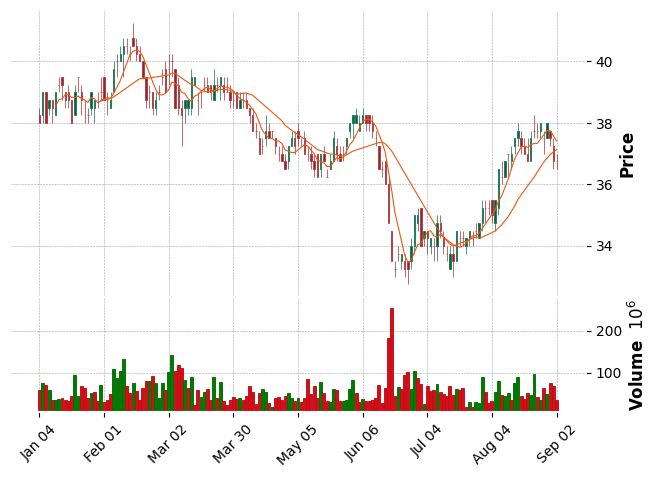

In [22]:
mpf.plot(data,**kwargs)

In [23]:
# There are many style for plotting
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

## Return & Volatility

* ret = df/df.shift(n) - 1, n = trading days
* ret = df.pct_change()
* mean of return using geometric average return
* standard deviation
* Volatility

geometric average return:

![title](fig/geometric_avr_return.png)

!![title](fig/Volatility.png)

rolling window is used to calculate volatility

Exponential weighted

In [24]:
import matplotlib.pyplot as plt
from pandas_datareader import data as web

In [25]:
start = '2020-01-01'
end = '2022-09-01'

In [26]:
tsla = web.get_data_yahoo('TSLA', start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [27]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500


In [28]:
price = tsla['Adj Close']

In [29]:
ret = price.pct_change()

In [30]:
ret.head()

Date
2019-12-31         NaN
2020-01-02    0.028518
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
Name: Adj Close, dtype: float64

In [31]:
weekly_ret =tsla.asfreq('W-MON').pct_change()

In [32]:
montly_price = price.resample('M').last()

In [33]:
montly_ret = montly_price.pct_change()

## simple moving avarage (SMA)

![title](fig/SMA.png)

In [34]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500


### manual SMA

In [35]:
sma_50 = tsla.Close.rolling(window=50).mean()

<AxesSubplot:xlabel='Date'>

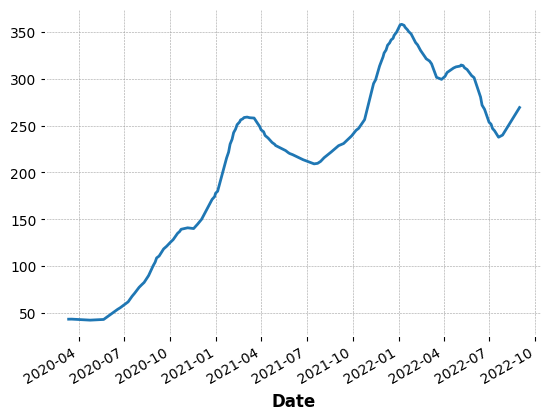

In [36]:
sma_50.plot()

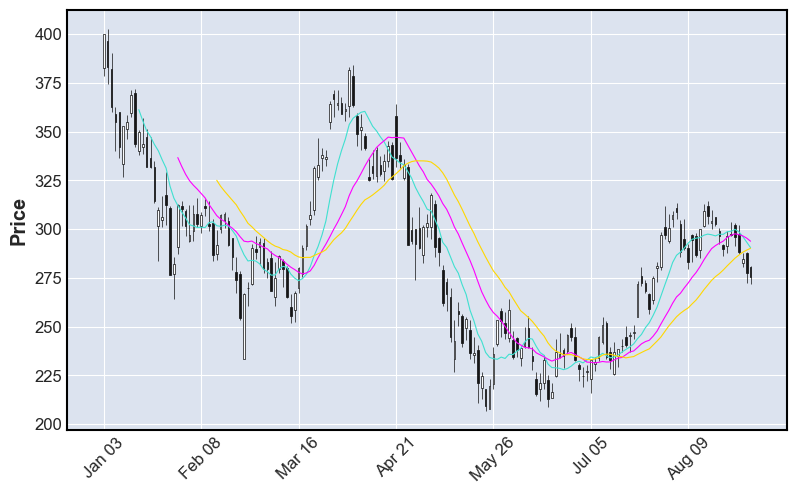

In [37]:
mpf.plot(tsla.loc['2022'], type = 'candle', figsize = (10,6), mav = (10,20,30))

## exponential moving average (EMA)
The EMA is designed to improve on the idea of an SMA by giving more weight to the most recent price data, which is considered to be more relevant than older data. Since new data carries greater weight, the EMA responds more quickly to price changes than the SMA does.

![title](fig/EMA.png)

In [85]:
# we can also use ta.ticker to download data if we have yfinance installed
df = pd.DataFrame()
AAPL_df = df.ta.ticker("aapl")

In [86]:
AAPL_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0.0
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0.0
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0.0
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0.0
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0.0


<AxesSubplot:xlabel='Date'>

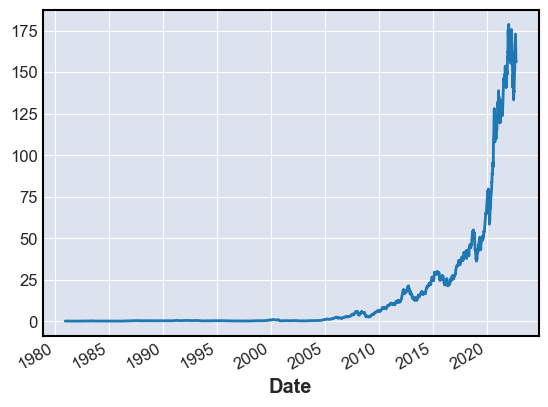

In [87]:
# EMA5
AAPL_df.ta.ema(5).plot()

## SMA Bollinger Band

### manual bband

In [89]:
AAPL_df['Mean'] = AAPL_df['Close'].rolling(window = 120).mean()
AAPL_df['std'] = AAPL_df['Close'].rolling(window = 120).std()

In [90]:
AAPL_df['Upper Band'] = AAPL_df['Mean'] +  (AAPL_df['std']*2)
AAPL_df['Lower Band'] = AAPL_df['Mean'] -  (AAPL_df['std']*2)

In [91]:
AAPL_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mean,std,Upper Band,Lower Band
Date,,,,,,,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0.0,NaN,NaN,NaN,NaN
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0.0,NaN,NaN,NaN,NaN
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0.0,NaN,NaN,NaN,NaN
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0.0,NaN,NaN,NaN,NaN
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0.0,NaN,NaN,NaN,NaN


In [93]:
BBAND = AAPL_df.loc[:,['Close','Mean','Upper Band','Lower Band']] 

<AxesSubplot:xlabel='Date'>

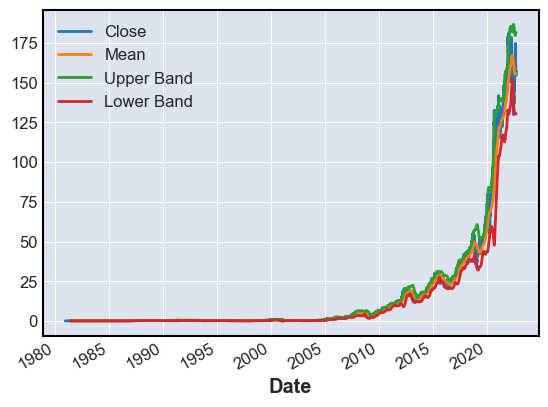

In [94]:
BBAND.plot()

In [65]:
AAPL_df.ta.bbands(close='Close', length=20, std=2, append=True)

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Date,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-02,155.142157,166.666001,178.189845,13.828668,0.028976
2022-09-06,153.478516,166.149001,178.819487,15.251955,0.041493
2022-09-07,152.277164,165.701002,179.124839,16.202482,0.137175
